In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('ticks')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})


In [10]:
def kl_divergence(p, q):
    epsilon = 1e-6  # Larger epsilon to avoid numerical issues
    p = torch.clamp(p, min=epsilon)
    q = torch.clamp(q, min=epsilon)
    return torch.sum(p * torch.log(p / q), dim=-1)

def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    jsd = 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
    return jsd

def jensen_shannon_distance(p, q):
    jsd = jensen_shannon_divergence(p, q)
    jsd = torch.clamp(jsd, min=0.0)  # Ensure no negative values
    return torch.sqrt(jsd)

In [11]:
d1_1 = np.load('../../data/js_distances_group_order/epoch_js_distances-d1.npy')
d1_2 = np.load('../../data/js_distances_group_order/epoch_js_distances-d1-2.npy')
d1_3 = np.load('../../data/js_distances_group_order/epoch_js_distances-d1-3.npy')

d2_1 = np.load('../../data/js_distances_group_order/epoch_js_distances-d2.npy')
d2_2 = np.load('../../data/js_distances_group_order/epoch_js_distances-d2-2.npy')
d2_3 = np.load('../../data/js_distances_group_order/epoch_js_distances-d2-3.npy')

d4_1 = np.load('../../data/js_distances_group_order/epoch_js_distances-d4.npy')
d4_2 = np.load('../../data/js_distances_group_order/epoch_js_distances-d4-2.npy')
d4_3 = np.load('../../data/js_distances_group_order/epoch_js_distances-d4-3.npy')

d8_1 = np.load('../../data/js_distances_group_order/epoch_js_distances-d8.npy')
d8_2 = np.load('../../data/js_distances_group_order/epoch_js_distances-d8-2.npy')
d8_3 = np.load('../../data/js_distances_group_order/epoch_js_distances-d8-3.npy')

cnn_1 = np.load('../../data/js_distances_group_order/epoch_js_distances-cnn.npy')
cnn_2 = np.load('../../data/js_distances_group_order/epoch_js_distances-cnn-2.npy')
cnn_3 = np.load('../../data/js_distances_group_order/epoch_js_distances-cnn-3.npy')


In [12]:
mean_d1 = np.mean(np.array([d1_1, d1_2, d1_3]), axis=0)
mean_d2 = np.mean(np.array([d2_1, d2_2, d2_3]), axis=0)
mean_d4 = np.mean(np.array([d4_1, d4_2, d4_3]), axis=0)
mean_d8 = np.mean(np.array([d8_1, d8_2, d8_3]), axis=0)
mean_cnn = np.mean(np.array([cnn_1, cnn_2, cnn_3]), axis=0)

std_d1 = np.std(np.array([d1_1, d1_2, d1_3]), axis=0)
std_d2 = np.std(np.array([d2_1, d2_2, d2_3]), axis=0)
std_d4 = np.std(np.array([d4_1, d4_2, d4_3]), axis=0)
std_d8 = np.std(np.array([d8_1, d8_2, d8_3]), axis=0)
std_cnn = np.std(np.array([cnn_1, cnn_2, cnn_3]), axis=0)

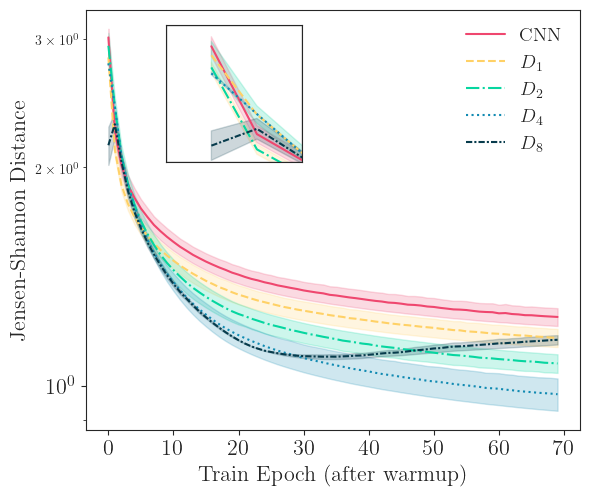

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline

colors = ['#ef476f',  # Orange
          '#ffd166',  # Blue
          '#06d6a0',  # Green
          '#118ab2',  # Light Blue
          '#073b4c']  # Pink

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Solid, dashed, dash-dot, dotted, custom

plt.figure(figsize=(6, 5))
xs = np.arange(0, 70, 1)
plt.plot(xs, mean_cnn[30:], label=r'CNN', color=colors[0], linestyle=line_styles[0])
plt.plot(xs,mean_d1[30:], label=r'$D_1$', color=colors[1], linestyle=line_styles[1])
plt.plot(xs,mean_d2[30:], label=r'$D_2$', color=colors[2], linestyle=line_styles[2])
plt.plot(xs,mean_d4[30:], label=r'$D_4$', color=colors[3], linestyle=line_styles[3])
plt.plot(xs,mean_d8[30:], label=r'$D_8$', color=colors[4], linestyle=line_styles[4])

plt.fill_between(xs, mean_cnn[30:] - std_cnn[30:], mean_cnn[30:] + std_cnn[30:], color=colors[0], alpha=0.2)
plt.fill_between(xs, mean_d1[30:] - std_d1[30:], mean_d1[30:] + std_d1[30:], color=colors[1], alpha=0.2)
plt.fill_between(xs, mean_d2[30:] - std_d2[30:], mean_d2[30:] + std_d2[30:], color=colors[2], alpha=0.2)
plt.fill_between(xs,  mean_d4[30:] - std_d4[30:], mean_d4[30:] + std_d4[30:], color=colors[3], alpha=0.2)
plt.fill_between(xs, mean_d8[30:] - std_d8[30:], mean_d8[30:] + std_d8[30:], color=colors[4], alpha=0.2)

plt.legend(frameon=False, fontsize=14)
plt.yscale('log')
plt.xlabel('Train Epoch (after warmup)', fontsize=16)
plt.ylabel('Jensen-Shannon Distance', fontsize=16)
plt.tight_layout()
# increase ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Inset zoomed-in plot
axins = zoomed_inset_axes(plt.gca(), zoom=7, bbox_to_anchor=(0.3, 0.8), bbox_transform=plt.gca().transAxes, loc="center")
axins.plot(mean_cnn, color=colors[0], linestyle=line_styles[0])
axins.plot(mean_d2, color=colors[1], linestyle=line_styles[1])
axins.plot(mean_d1, color=colors[2], linestyle=line_styles[2])
axins.plot(mean_d4, color=colors[3], linestyle=line_styles[3])
axins.plot(mean_d8, color=colors[4], linestyle=line_styles[4])
axins.fill_between(range(len(mean_cnn)), mean_cnn - std_cnn, mean_cnn + std_cnn, color=colors[0], alpha=0.2)
axins.fill_between(range(len(mean_d1)), mean_d1 - std_d1, mean_d1 + std_d1, color=colors[1], alpha=0.2)
axins.fill_between(range(len(mean_d2)), mean_d2 - std_d2, mean_d2 + std_d2, color=colors[2], alpha=0.2)
axins.fill_between(range(len(mean_d4)), mean_d4 - std_d4, mean_d4 + std_d4, color=colors[3], alpha=0.2)
axins.fill_between(range(len(mean_d8)), mean_d8 - std_d8, mean_d8 + std_d8, color=colors[4], alpha=0.2)

x1, x2, y1, y2 = 29, 32, 2, 3.2  # adjust these values as needed for the initial points
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Hide tick labels on the inset plot
axins.set_xticks([])
axins.set_yticks([])

# Set the aspect ratio to make the inset less tall
axins.set_aspect((x2 - x1) / (y2 - y1))

# Connect the inset plot to the main plot with lines
mark_inset(plt.gca(), axins, loc1=1, loc2=1, fc="none", ec="0.5")
plt.savefig('/Users/snehpandya/Projects/GCNN_DA/plots/jsd_mnistm_v2.pdf', format='pdf', bbox_inches='tight')
# plt.show();
